<table>
<tr>
<td width=15%><img src="https://www.nitrkl.ac.in/assets/images/logo.png"></img></td>
<td><center><h1>National Institute of Technology
Rourkela, Odisha, India, 769008</h1><h2>Department of Computer Science Engineering</h2></center></td>
</tr>
<tr><td colspan=2><center><h3>Laborotary-4</h3></br>
            <b>(Data Science Laborotary)</b></center></td></tr>
</table>

##Linear Regression

Importing libraries

In [ ]:
#121CS0228
#Roshan Kumar Sahu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read the salary dataset

In [3]:
# your answer here
df=pd.read_csv("Salary_Data.csv")

Show the first 10 rows of the dataset

In [5]:
# your answer here
df.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


Show the dimensions (No. of rows and coulmns) of the dataset

In [7]:
# your answer here
df.shape

(30, 2)

Print all the column names of the dataset

In [8]:
# your answer here
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

Print general information of the dataset like column, and datatype.

In [13]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

Extract independent and dependent features and store it in two different variables.

In [106]:
# your answer here
x=np.array(df['YearsExperience']).reshape(-1,1)
y=np.array(df['Salary']).reshape(-1,1)

Split the dataset into train and test set

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25)

Training the Simple Linear Regression model on the Training set

In [22]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

0.942679634311036

Predict the Test set results

In [30]:
# your answer here
reg.score(X_test, y_test)

0.9751421398953937

Visualize the linear regression on training data using scatterplot.

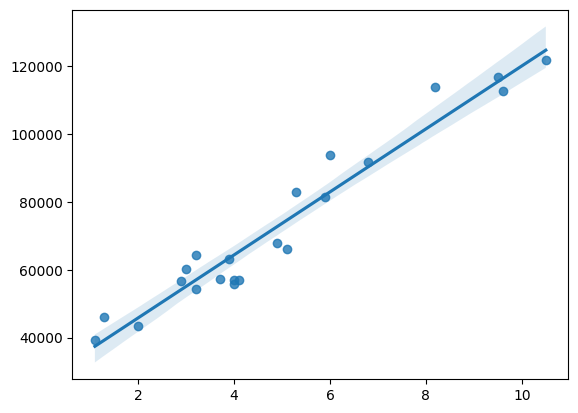

In [28]:
# your answer here
import seaborn as sns
sns.regplot(x=X_train, y=y_train, data=df);

Visualize the linear regression on test data using scatterplot.

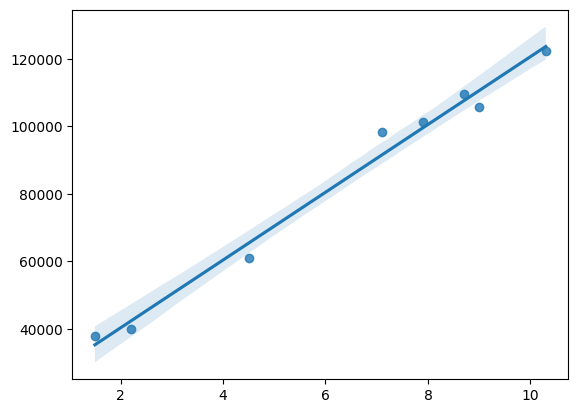

In [29]:
# your answer here
sns.regplot(x=X_test, y=y_test, data=df);

Finding R^2 score

In [32]:
from sklearn.metrics import r2_score

In [33]:
# your answer here
y_pred=reg.predict(X_test)
r2_score(y_test,y_pred)

0.9751421398953937

##Logistic Regression

Import Libraries

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Read the heart failure dataset

In [68]:
# your answer here
df_heart=pd.read_csv("heart.csv")

Display the first five rows


In [35]:
# your answer here
df_heart.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Check for missing values

In [67]:
# your answer here
print(df_heart.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Describe numerical features

In [40]:
# your answer here
df_heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Visualize the distribution of key features (Age, Cholesterol, MaxHR) using histograms.

<Axes: xlabel='Age', ylabel='Count'>

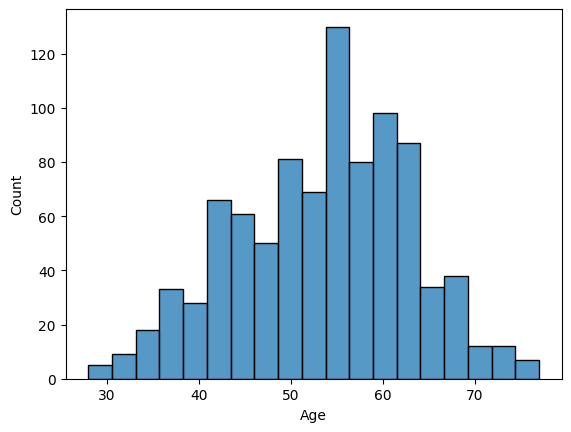

In [42]:
# your answer here
sns.histplot(x='Age',data=df_heart)

<Axes: xlabel='Cholesterol', ylabel='Count'>

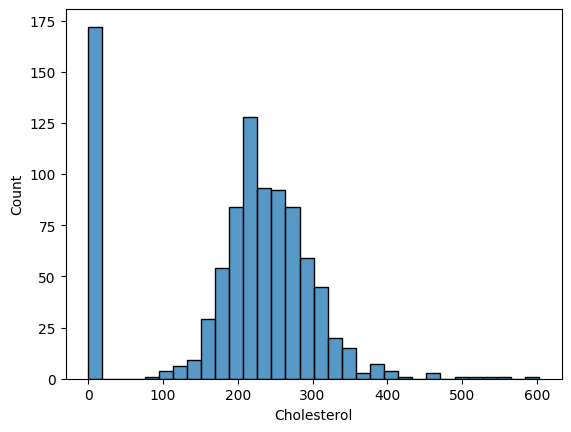

In [44]:
sns.histplot(x='Cholesterol',data=df_heart)

<Axes: xlabel='MaxHR', ylabel='Count'>

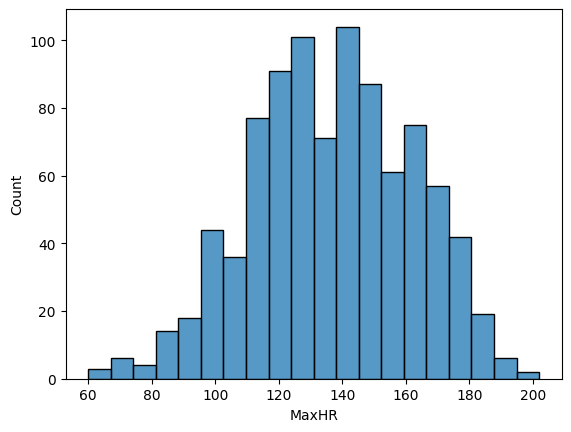

In [45]:
sns.histplot(x='MaxHR',data=df_heart)

List all categorical_features

In [51]:
# your answer here
print(df_heart.nunique())
print(df_heart.dtypes)
catg=df_heart[['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope']]
print(catg)

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object
    Sex ChestPainType  FastingBS RestingECG ExerciseAngina ST_Slope
0     M           ATA          0     Normal              N       Up
1     F           NAP          0     Normal              N     Flat
2     M           ATA          0         ST              N       Up
3     F           ASY          0     Normal              Y     Flat
4     M           NAP          0     Normal              

Convert categorical variables into numerical format using label encoding.

In [70]:
# your answer here
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
for i in catg:
    df_heart[i]= label_encoder.fit_transform(catg[i]) 
print(df_heart)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           0   
917   38    1              2        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  Hear

Analyze the correlation between features using a heatmap.

<Axes: >

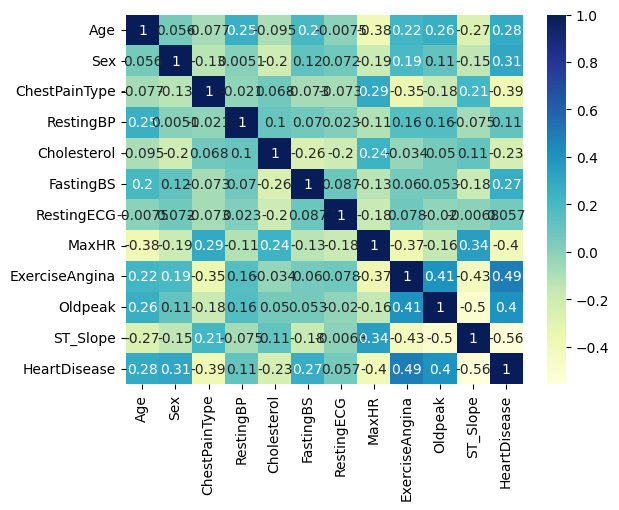

In [71]:
# your answer here
sns.heatmap(df_heart.corr(), cmap="YlGnBu", annot=True) 

Split the dataset into training and testing sets (80-20 split).

In [121]:
# your answer here
from sklearn.model_selection import train_test_split

x_heart = np.array(df_heart.drop('HeartDisease', axis=1))
y_heart = np.array(df_heart['HeartDisease'])
X_train, X_test, y_train, y_test = train_test_split(x_heart, y_heart, test_size=0.2)


Perform hyperparameter tuning on logistic regression using GridSearchCV to find the best parameters

In [122]:
# your answer here
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
param_grid = {
    'C': [0.1,0.5, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'C': 0.5, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.8542633491752867


Train the logistic regression model using the best parameters obtained from GridSearchCV and evaluate its performance on the test set using accuracy, confusion matrix, and classification report.

In [123]:
# your answer here
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.8369565217391305
Confusion Matrix:
 [[64 19]
 [11 90]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.77      0.81        83
           1       0.83      0.89      0.86       101

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



In [116]:
from sklearn.metrics import roc_curve, roc_auc_score

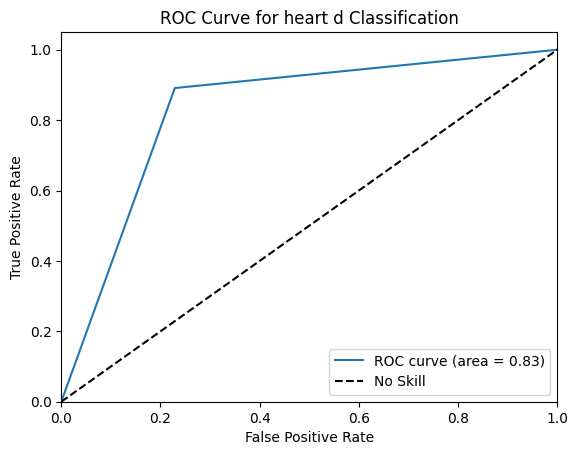

In [132]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for heart d Classification')
plt.legend()
plt.show()

In [125]:
# your answer here
print(roc_curve(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

(array([0.        , 0.22891566, 1.        ]), array([0.        , 0.89108911, 1.        ]), array([inf,  1.,  0.]))
0.8310867231301444


Fitting 5 folds for each of 28 candidates, totalling 140 fits


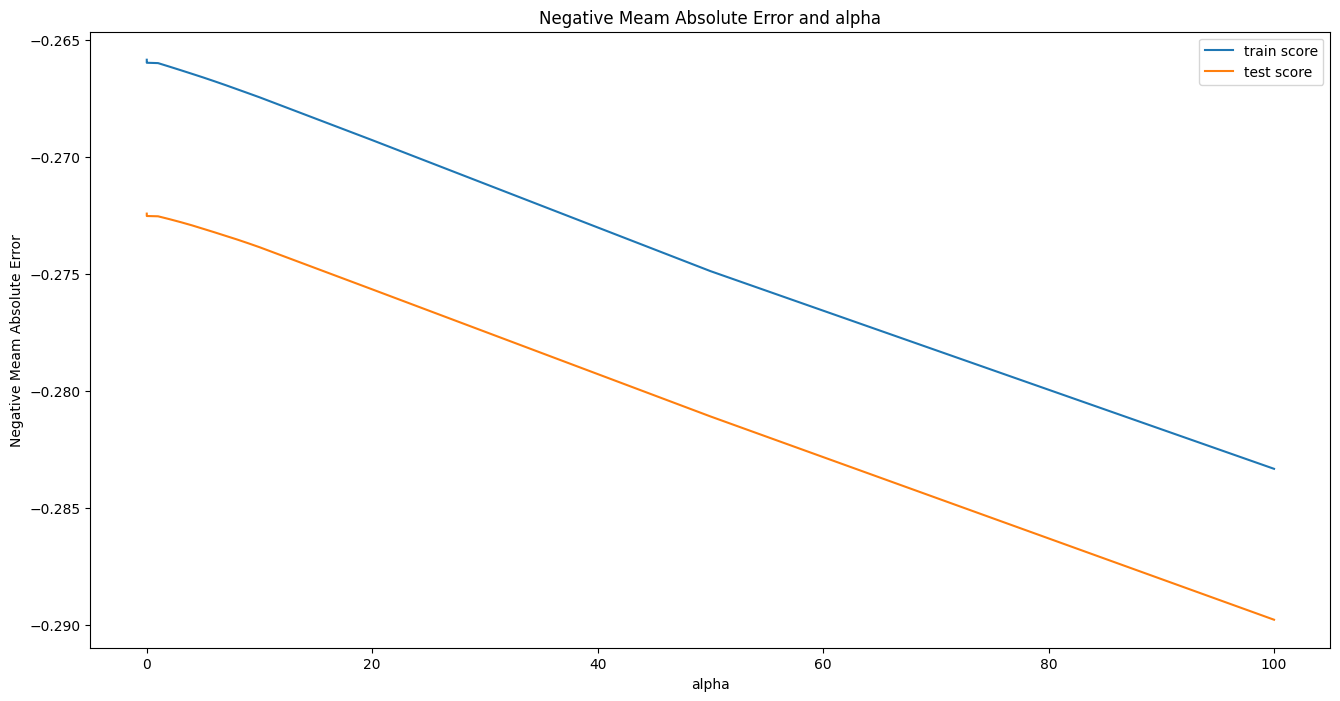

In [126]:
# list of alpha to tune
from sklearn.linear_model import Ridge
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 
                    10.0, 20, 50, 100, 500, 1000 ]}

#initialising Ridge() function
ridge = Ridge()
# defining cross validation folds as 5
folds = 5
# Defining GridSearchCV
grid_cv_model = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)

# fiting GridSearchCV() with X_train and y_train
grid_cv_model.fit(X_train,y_train)
cv_results = pd.DataFrame(grid_cv_model.cv_results_)

# filter cv_results with all param_alpha less than or equal to 200
cv_results = cv_results[cv_results['param_alpha']<=200]

# cv_results head
cv_results.head()
# changing datatype of 'param_alpha' into int
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])

plt.title('Negative Meam Absolute Error and alpha')
plt.xlabel('alpha')
plt.ylabel('Negative Meam Absolute Error')
plt.legend(['train score','test score'],loc='upper right')

plt.show()